# What is Machine Learning?

# Introducing Scikit-Learn

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Supervised learning: Taxis Classifications

In [97]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [98]:
taxis.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [99]:
taxis = taxis.drop(columns=['pickup', 'dropoff', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'])

print(taxis.isnull().sum())

passengers    0
distance      0
fare          0
tip           0
tolls         0
dtype: int64


In [100]:
taxis['ride_type'] = taxis['distance'].apply(lambda x: 'short' if x < 5 else 'long')

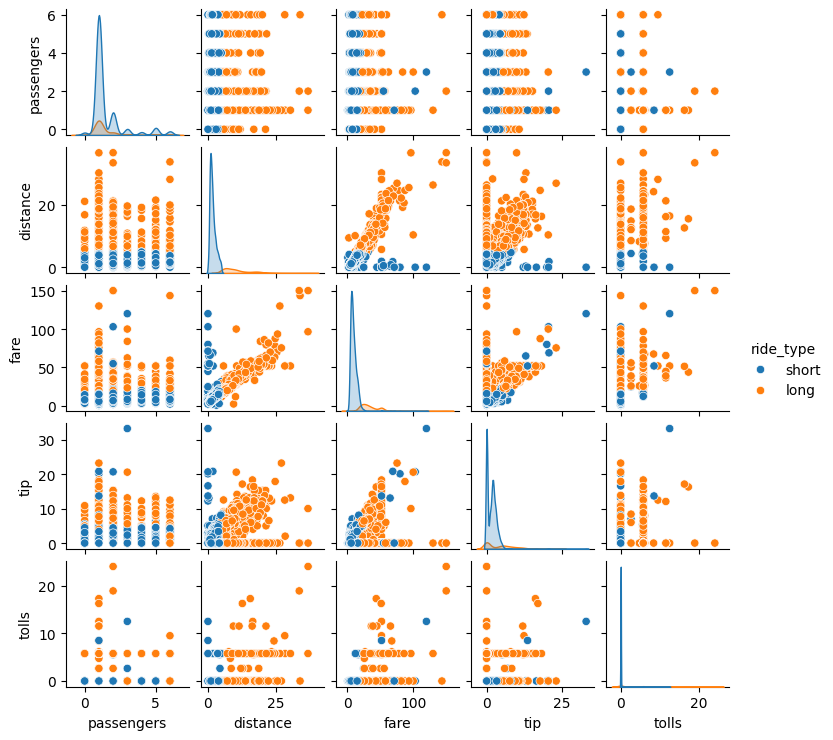

In [101]:
sns.pairplot(taxis, hue='ride_type', height=1.5);

In [104]:
X_taxis = taxis.drop('ride_type',axis=1)
y_taxis = taxis['ride_type']

In [105]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_taxis, y_taxis,
                                                random_state=1)

In [106]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9869484151646986

## Unsupervised learning: Wine Dimensionality

In [156]:
# can use this dataset from scikit-learn without pre-processing
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [157]:
X = wine.data

In [158]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)         # 4. Transform the data to two dimensions

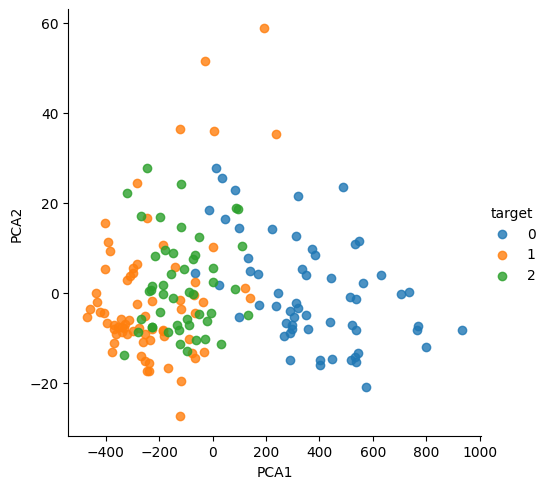

In [162]:
wine_df['PCA1'] = X_2D[:, 0]
wine_df['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='target', data=wine_df, fit_reg=False);

In [165]:
from sklearn.mixture import GaussianMixture     # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')             # 2. Instantiate the model with hyperparameters
model.fit(X)                                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)                        # 4. Determine cluster labels

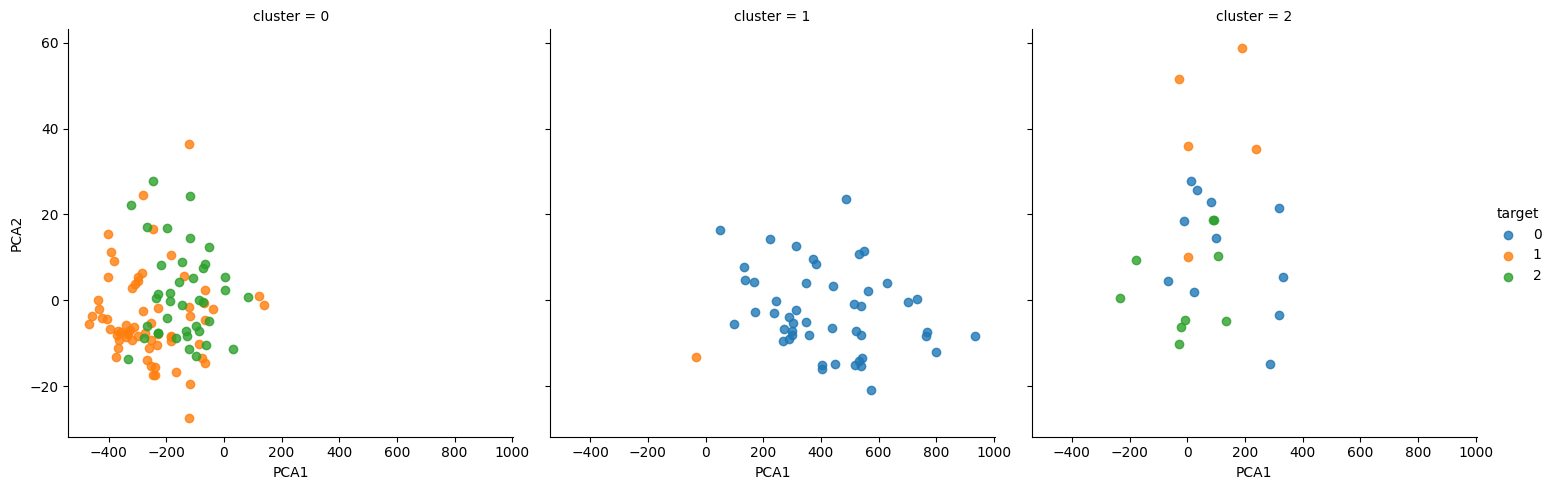

In [169]:
wine_df['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=wine_df, hue='target',
           col='cluster', fit_reg=False);

## Unsupervised learning: Breast Cancer clustering

In [171]:
# can use this dataset from scikit-learn without pre-processing
from sklearn.datasets import load_breast_cancer
import pandas as pd
BC = load_breast_cancer()
BC_df = pd.DataFrame(data=BC.data, columns=BC.feature_names)
BC_df['target'] = BC.target
BC_df

X = BC.data

In [172]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)         # 4. Transform the data to two dimensions

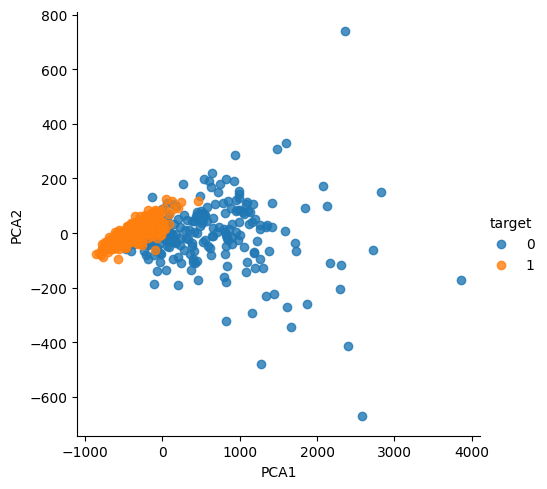

In [175]:
BC_df['PCA1'] = X_2D[:, 0]
BC_df['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='target', data=BC_df, fit_reg=False);

In [180]:
from sklearn.mixture import GaussianMixture     # 1. Choose the model class
model = GaussianMixture(n_components=2,
            covariance_type='full')             # 2. Instantiate the model with hyperparameters
model.fit(X)                                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)   

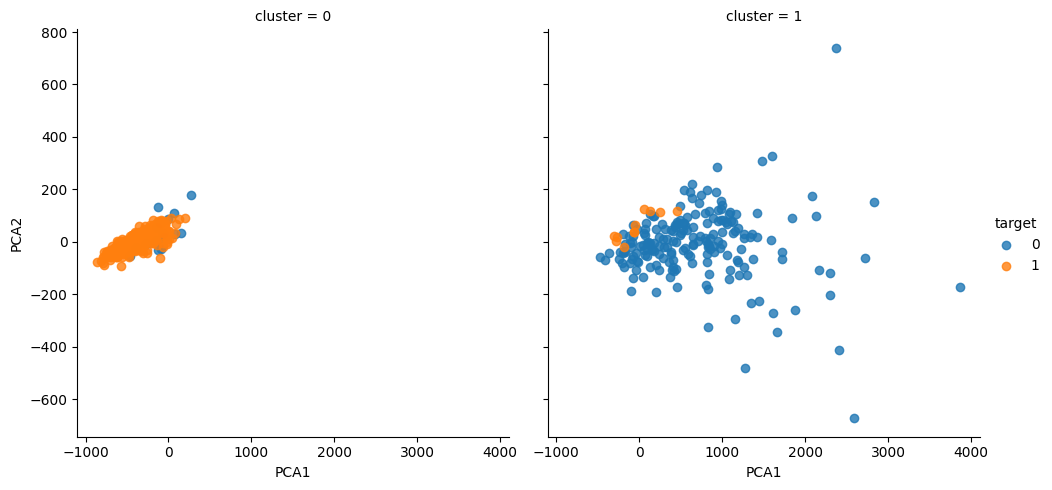

In [181]:
BC_df['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=BC_df, hue='target',
           col='cluster', fit_reg=False);

In [ ]:
# use this dataset from seaborn for gaussianNB with modifications 
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# convert categorical data to numerical data
tips['sex'] = tips['sex'].map({'Male': 0, 'Female': 1})
tips['smoker'] = tips['smoker'].map({'No': 0, 'Yes': 1})
tips['day'] = tips['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
tips['time'] = tips['time'].map({'Lunch': 0, 'Dinner': 1})
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,3,1,2
1,10.34,1.66,0,0,3,1,3
2,21.01,3.50,0,0,3,1,3
3,23.68,3.31,0,0,3,1,2
4,24.59,3.61,1,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,2,1,3
240,27.18,2.00,1,1,2,1,2
241,22.67,2.00,0,1,2,1,2
242,17.82,1.75,0,0,2,1,2


## Hand Written Digits

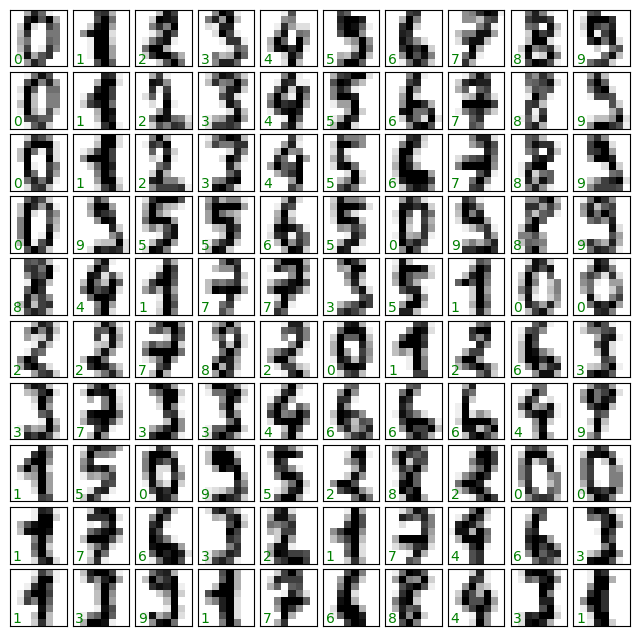

In [182]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [184]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

C:\Users\Zachary.Cone.SERN\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Zachary.Cone.SERN\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


C:\Users\Zachary.Cone.SERN\AppData\Local\Temp\ipykernel_2712\1386556416.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


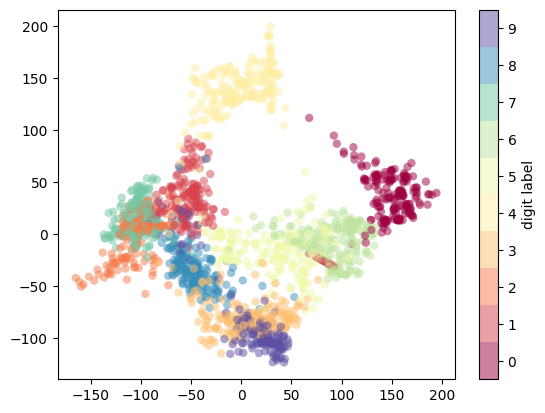

In [192]:
X = digits.data
y = digits.target

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [194]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

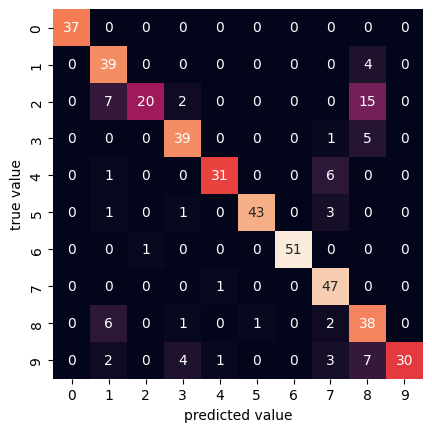

In [196]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

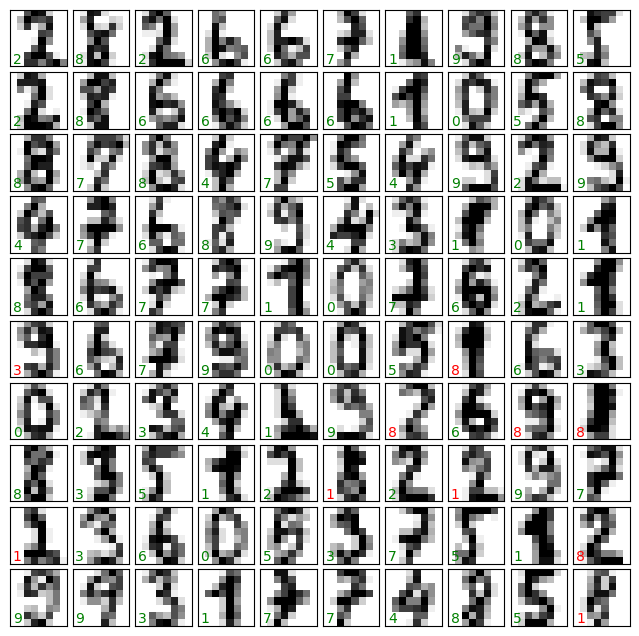

In [197]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

# Hyperparameters and Model Validation

## Model Validation

### The Wrong Way

In [198]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [200]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
y_model = model.predict(X)

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

### The Correct Way

In [205]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

## Selecting the Best Model

### The Bias-variance trade-off

In [212]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [213]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

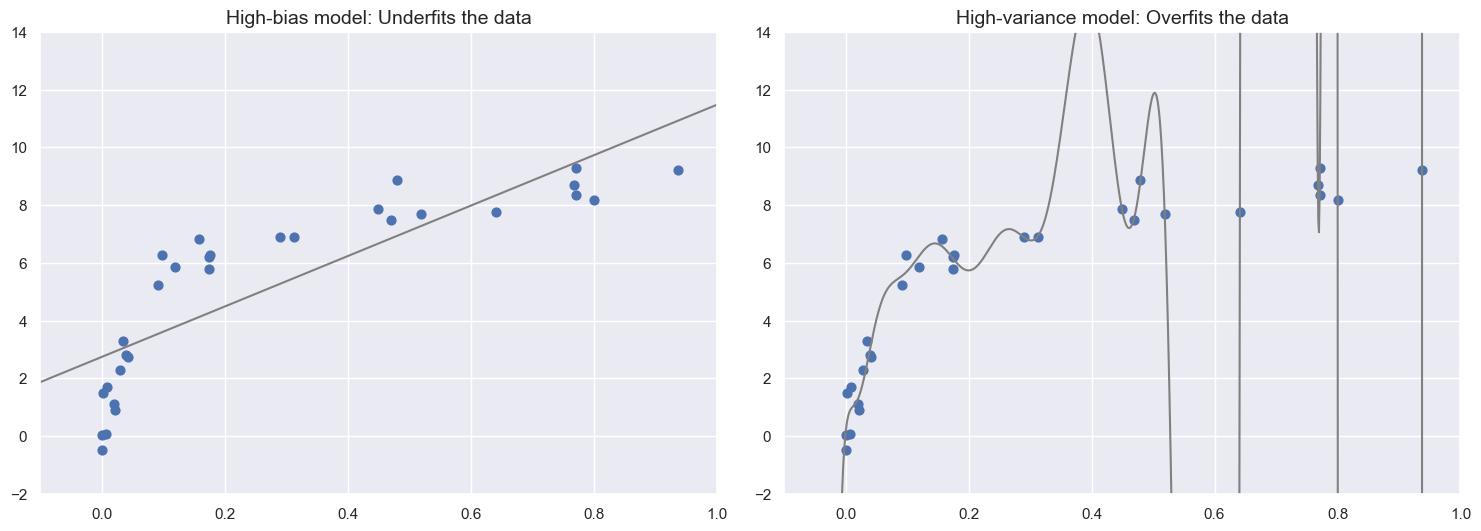

In [217]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
fig.savefig('05.03-bias-variance.png')

### Validation curves in Scikit-Learn

In [206]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn; sns()
import numpy as np


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [210]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

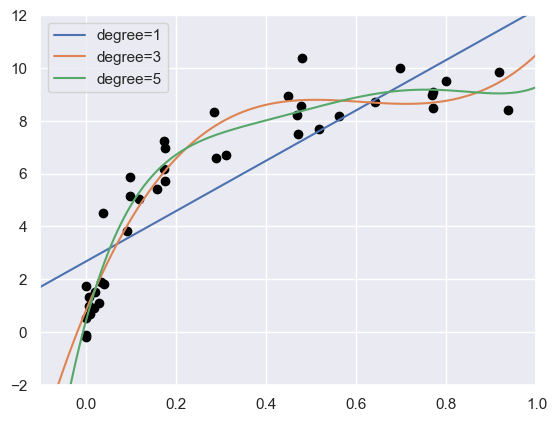

In [209]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

# Feature Engineering

# In-Depth: Support Vector Machines

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Motivating Support Vector Machines

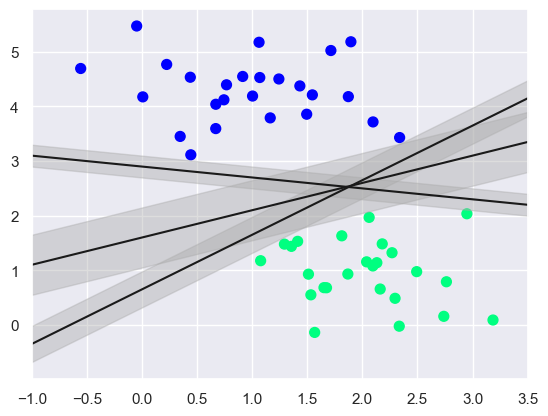

In [235]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

# Application: A Face Detection Pipeline